In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
import numpy as np
from sklearn.preprocessing import StandardScaler 

### Graph Seetings

In [2]:
barcolor=['#68D4CD', '#CFF67B', '#94DAFB','#FD8080','#6D848E','#26A0FC', '#26E7A6','#FEBC3B','#FAB1B2','#8B75D7']
edgecolor='#666666'

In [3]:
df = pd.read_excel('https://drive.google.com/uc?id=1cHBlV6aQ_xzwhCNvanSgLKIA8k0gcqkv', header=0)

In [4]:
df.describe()

,LAT,LON,ELEVATION_m,ACRES,PPT_mm,TMIN_c,TMAX_c,VPD9AM_hpa,VPD3PM_hpa,lfmc_mean,lfmc_stdv,population,Station_TDMEAN_c,Mean_Sea_Level_Pressure,Mean_Station_Pressure,Mean_Wind_Speed,Maximum_Sustained_Wind_Speed,TMEAN_c
count,33300.000000,33300.000000,33300.000000,3.330000e+04,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000
mean,-28.135786,119.489992,284.682372,2.596438e+03,1.026168,14.975123,30.000228,12.483609,11.150020,73.643045,16.609961,16251.148739,8.728589,1013.965652,991.840465,14.764264,44.323613,22.487675
std,4.806573,3.880292,152.522375,3.124251e+04,3.554397,6.709938,8.636054,5.055758,5.215414,40.080335,5.853644,33681.893415,6.315326,6.373546,10.949037,5.195746,10.616161,7.434075
min,-35.112900,113.199200,-17.000000,0.000000e+00,0.000000,-1.460000,10.960000,0.000000,0.000000,4.440000,3.458670,79.000000,-57.000000,993.500000,954.900000,0.300000,9.800000,6.625000
25%,-32.810725,116.089575,175.000000,4.927775e+00,0.000000,9.440000,23.210000,9.210000,7.230000,55.580002,13.143747,1216.000000,5.700000,1008.700000,983.300000,11.900000,38.100000,16.495000
50%,-28.438200,118.035150,281.000000,2.659265e+01,0.000000,14.330000,30.550000,11.920000,10.890000,57.235001,15.078564,8510.000000,9.300000,1013.800000,993.300000,14.300000,42.900000,22.370000
75%,-22.930025,122.712200,404.000000,2.477832e+02,0.100000,20.122500,37.120000,14.820000,13.940000,92.385626,18.206376,12819.000000,12.400000,1018.500000,999.900000,17.300000,49.000000,28.645000
max,-20.094700,128.999900,979.000000,3.756446e+06,64.900000,33.290000,48.670000,38.840000,35.700000,299.887512,76.268379,208237.000000,37.500000,1038.500000,1026.300000,198.600000,102.600000,39.580000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33300 entries, 0 to 33299
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   IDATE                         33300 non-null  datetime64[ns]
 1   LAT                           33300 non-null  float64       
 2   LON                           33300 non-null  float64       
 3   ELEVATION_m                   33300 non-null  int64         
 4   ACRES                         33300 non-null  float64       
 5   PPT_mm                        33300 non-null  float64       
 6   TMIN_c                        33300 non-null  float64       
 7   TMAX_c                        33300 non-null  float64       
 8   VPD9AM_hpa                    33300 non-null  float64       
 9   VPD3PM_hpa                    33300 non-null  float64       
 10  lfmc_mean                     33300 non-null  float64       
 11  lfmc_stdv                   

### Box plot for normality test

In [6]:
df_t=df[['LAT','LON','ELEVATION_m','ACRES','PPT_mm','TMIN_c','TMAX_c','VPD9AM_hpa','VPD3PM_hpa','lfmc_mean','lfmc_stdv','population','Station_TDMEAN_c','Mean_Sea_Level_Pressure','Mean_Station_Pressure','Mean_Wind_Speed','Maximum_Sustained_Wind_Speed','TMEAN_c']]

In [7]:
scalar=StandardScaler() #Original
df_t = pd.DataFrame(scalar.fit_transform(df_t), index=df_t.index, columns=df_t.columns)

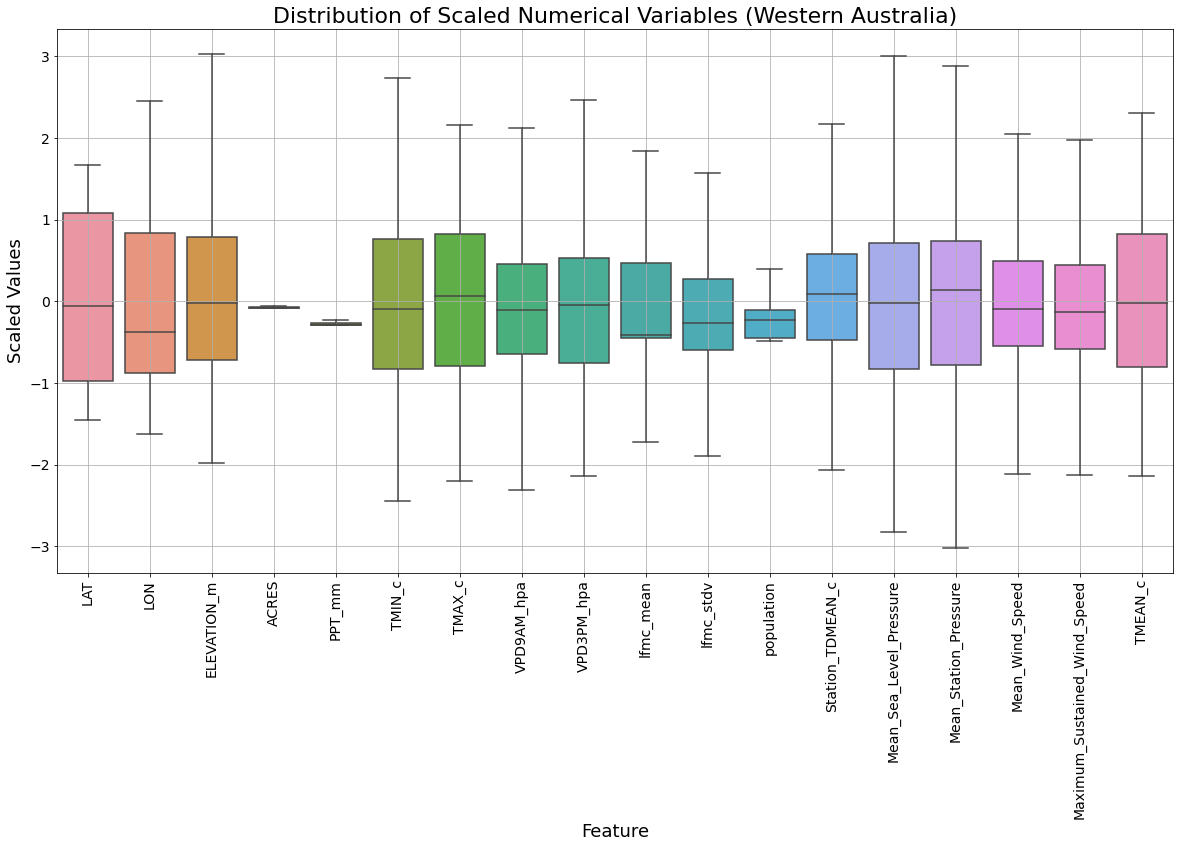

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
ax=sn.boxplot(data = df_t, showfliers=False)
ax.grid(True)
ax.set_xlabel('Feature', fontsize=18)
ax.set_ylabel('Scaled Values', fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
ax.set_title("Distribution of Scaled Numerical Variables (Western Australia)",size=22)
plt.show()

### Date vs Fire

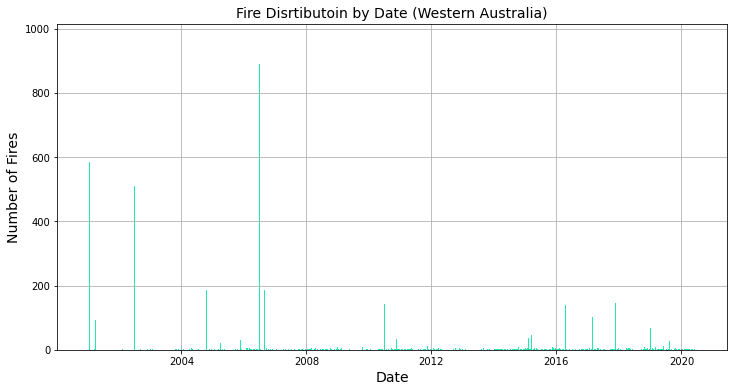

In [9]:
df_gb = df[['IDATE','ACRES']].groupby(['IDATE'], as_index=False).count().rename(columns={"ACRES": "COUNT"})
fig, ax = plt.subplots(figsize=(12,6))
im=ax.bar(df_gb['IDATE'], df_gb['COUNT'], color='#26E7A6')
ax.grid(True)
ax.set_xlabel("Date", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Fire Disrtibutoin by Date (Western Australia)",size=14)
plt.show()

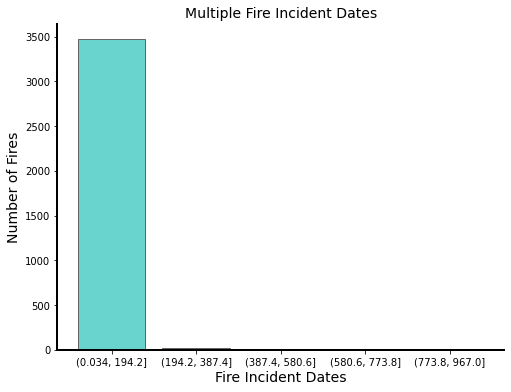

In [10]:
df_gb['bins']=pd.cut(x=df_gb['COUNT'], bins=5)
df_gb_bin=df_gb[['COUNT','bins']].groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
im=ax.bar(df_gb_bin['bins'].astype(str), df_gb_bin['COUNT'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Fire Incident Dates", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Multiple Fire Incident Dates",size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.show()

In [11]:
df_gb_bin

,bins,COUNT
0,"(0.034, 194.2]",3472
1,"(194.2, 387.4]",23
2,"(387.4, 580.6]",6
3,"(580.6, 773.8]",2
4,"(773.8, 967.0]",2


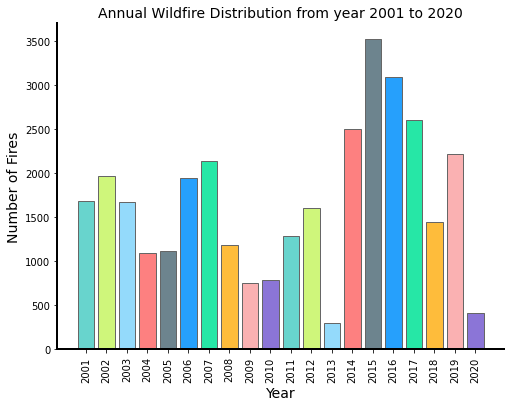

In [12]:
df0=df.copy()
df0['IDATE']=df0['IDATE'].dt.strftime('%Y')
df_gb0 = df0[['IDATE','ACRES']].groupby(['IDATE'], as_index=False).count().rename(columns={"ACRES": "COUNT"})
fig, ax = plt.subplots(figsize=(8,6))
im=ax.bar(df_gb0['IDATE'], df_gb0['COUNT'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Year", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Annual Wildfire Distribution from year 2001 to 2020",size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.xticks(rotation=90)
plt.show()

In [13]:
df_gb0

,IDATE,COUNT
0,2001,1683
1,2002,1962
2,2003,1668
3,2004,1096
4,2005,1110
5,2006,1945
6,2007,2139
7,2008,1181
8,2009,758
9,2010,792


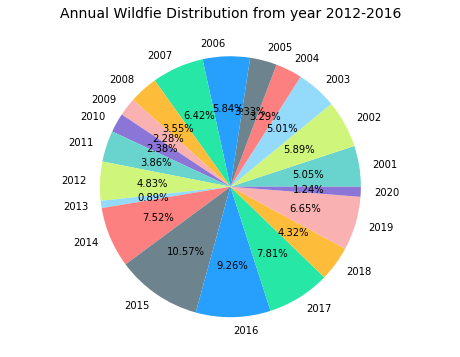

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb0['COUNT'], labels = df_gb0['IDATE'],autopct='%1.2f%%', colors=barcolor)
ax.set_title("Annual Wildfie Distribution from year 2012-2016",size=14)
plt.show()

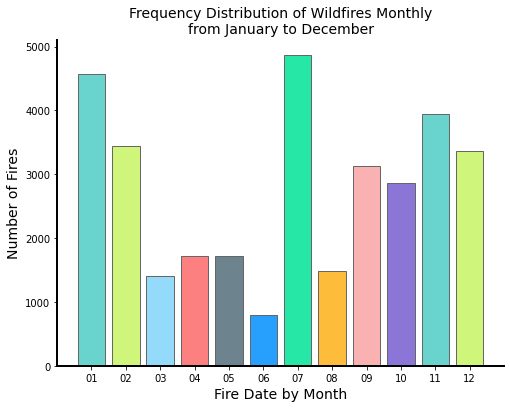

In [15]:
df1=df.copy()
df1['IDATE']=df1['IDATE'].dt.strftime('%m')
df_gb1 = df1[['IDATE','ACRES']].groupby(['IDATE'], as_index=False).count().rename(columns={"ACRES": "COUNT"})
fig, ax = plt.subplots(figsize=(8,6))
im=ax.bar(df_gb1['IDATE'], df_gb1['COUNT'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Fire Date by Month", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Frequency Distribution of Wildfires Monthly\nfrom January to December",size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.show()

### Lat Lon vs Fire

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


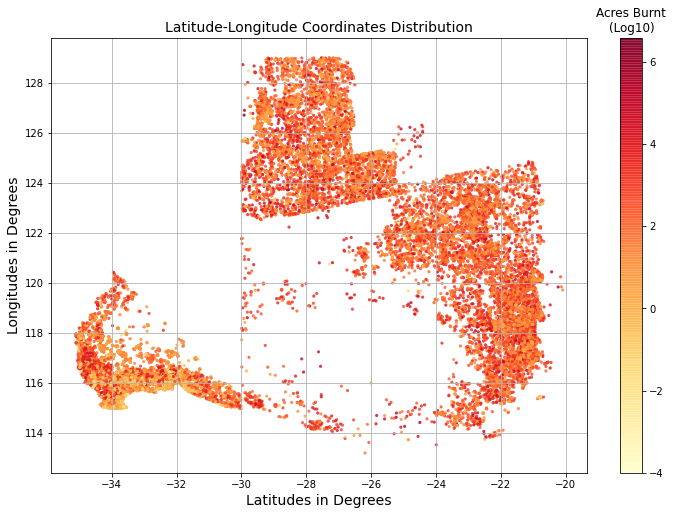

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
im=ax.scatter(x=df['LAT'],y=df['LON'], alpha=0.8, edgecolors='none',c=np.log10(df['ACRES']), s=10, cmap=cm.YlOrRd)
ax.grid(True)
ax.set_xlabel("Latitudes in Degrees", size=14)
ax.set_ylabel("Longitudes in Degrees", size=14)
ax.set_title("Latitude-Longitude Coordinates Distribution",size=14)
cbar=fig.colorbar(im, ax=ax)
cbar.ax.set_title('Acres Burnt\n(Log10)',size=12)
plt.show()

### Elevation vs Fire

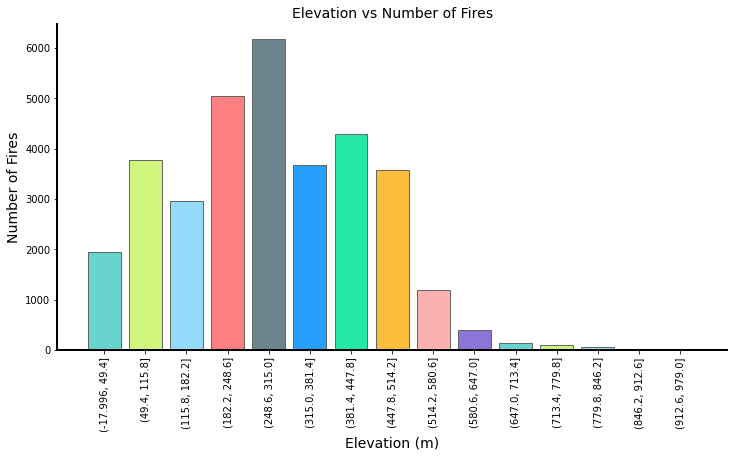

In [17]:
df3=df[['ELEVATION_m']].copy()
df3['bins']=pd.cut(x=df3['ELEVATION_m'], bins=15)
df_gb_bin3=df3.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(12,6))
im=ax.bar(df_gb_bin3['bins'].astype(str), df_gb_bin3['ELEVATION_m'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Elevation (m)", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Elevation vs Number of Fires",size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.xticks(rotation=90)
plt.show()

### Acres vs Fire

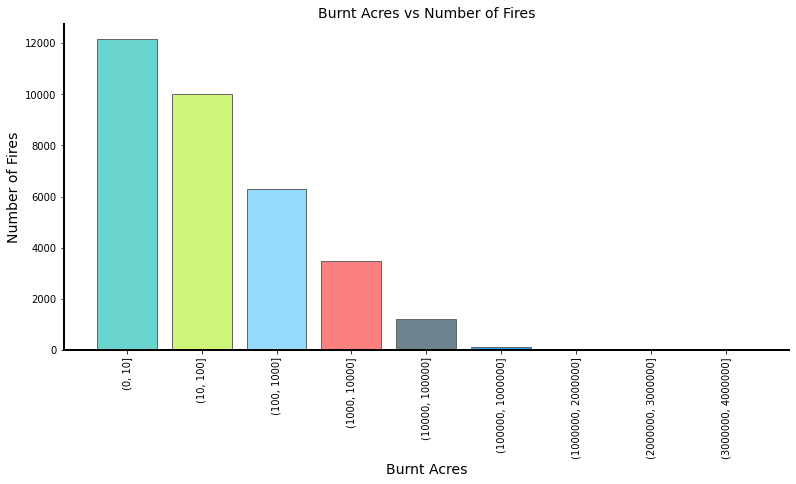

In [18]:
df4=df[['ACRES']].copy()
df4['bins']=pd.cut(x=df4['ACRES'], bins=[0,10,100,1000,10000,100000,1000000,2000000,3000000,4000000])
df_gb_bin4=df4.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(13,6))
im=ax.bar(df_gb_bin4['bins'].astype(str), df_gb_bin4['ACRES'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Burnt Acres", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Burnt Acres vs Number of Fires",size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.xticks(rotation=90)
plt.show()

In [19]:
df_gb_bin4

,bins,ACRES
0,"(0, 10]",12146
1,"(10, 100]",10018
2,"(100, 1000]",6296
3,"(1000, 10000]",3491
4,"(10000, 100000]",1206
5,"(100000, 1000000]",136
6,"(1000000, 2000000]",2
7,"(2000000, 3000000]",1
8,"(3000000, 4000000]",1


###Precipitation vs Fire

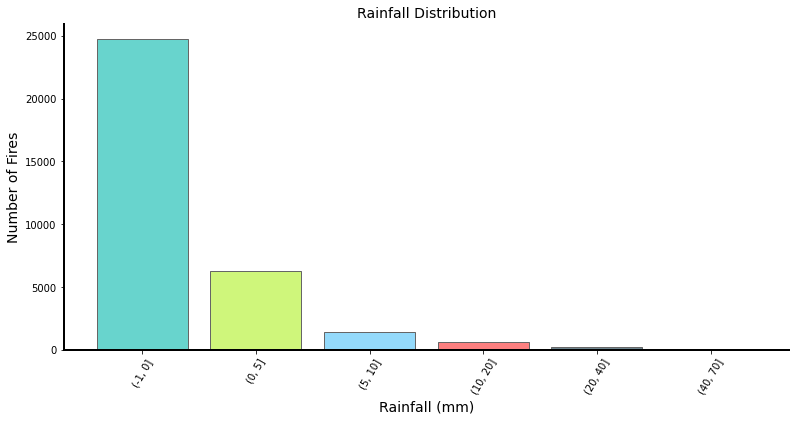

In [20]:
df5=df[['PPT_mm']].copy()
df5['bins']=pd.cut(x=df5['PPT_mm'], bins=[-1,0,5,10,20,40,70])
df_gb_bin5=df5.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(13,6))
im=ax.bar(df_gb_bin5['bins'].astype(str), df_gb_bin5['PPT_mm'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Rainfall (mm)", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Rainfall Distribution",size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.xticks(rotation=60)
plt.show()

In [21]:
df_gb_bin5

,bins,PPT_mm
0,"(-1, 0]",24729
1,"(0, 5]",6266
2,"(5, 10]",1450
3,"(10, 20]",594
4,"(20, 40]",227
5,"(40, 70]",34


### Max Temperature vs Fire

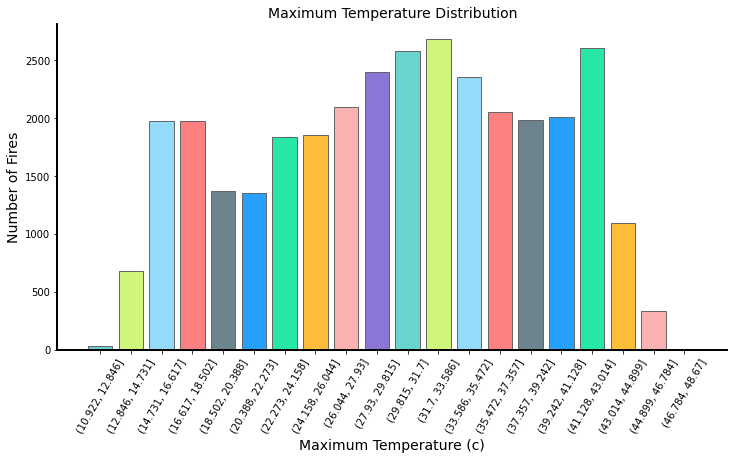

In [22]:
df6=df[['TMAX_c']].copy()
df6['bins']=pd.cut(x=df6['TMAX_c'], bins=20)
df_gb_bin6=df6.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(12,6))
im=ax.bar(df_gb_bin6['bins'].astype(str), df_gb_bin6['TMAX_c'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Maximum Temperature (c)", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Maximum Temperature Distribution",size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.xticks(rotation=60)
plt.show()

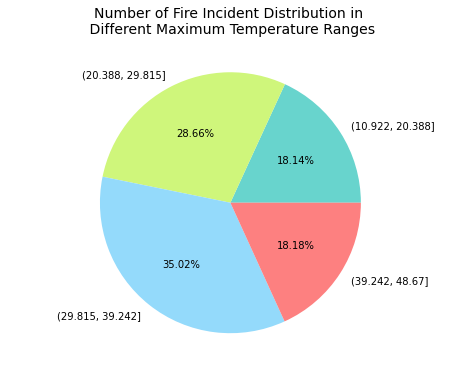

In [23]:
df6=df[['TMAX_c']].copy()
df6['bins']=pd.cut(x=df6['TMAX_c'], bins=4)
df_gb_bin6=df6.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin6['TMAX_c'], labels = df_gb_bin6['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("Number of Fire Incident Distribution in \n Different Maximum Temperature Ranges",size=14)
plt.show()

### Min Temperature vs Fire

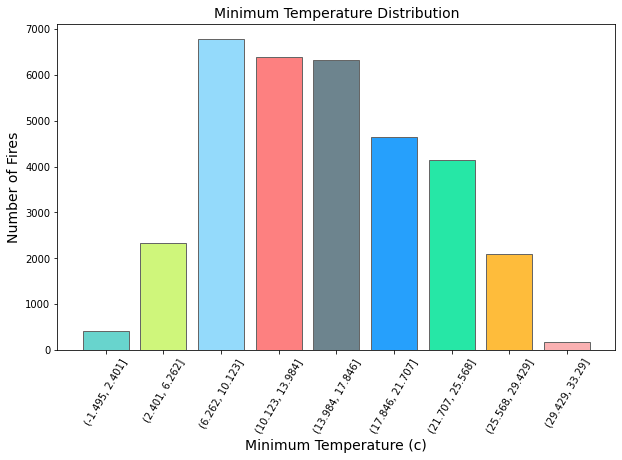

In [24]:
df7=df[['TMIN_c']].copy()
df7['bins']=pd.cut(x=df7['TMIN_c'], bins=9)
df_gb_bin7=df7.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(10,6))
im=ax.bar(df_gb_bin7['bins'].astype(str), df_gb_bin7['TMIN_c'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Minimum Temperature (c)", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Minimum Temperature Distribution",size=14)
plt.xticks(rotation=60)
plt.show()

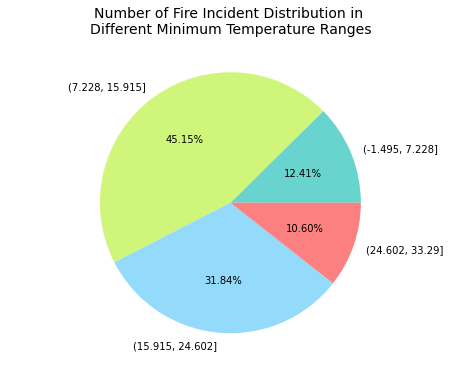

In [25]:
df7=df[['TMIN_c']].copy()
df7['bins']=pd.cut(x=df7['TMIN_c'], bins=4)
df_gb_bin7=df7.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin7['TMIN_c'], labels = df_gb_bin7['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("Number of Fire Incident Distribution in \nDifferent Minimum Temperature Ranges",size=14)
plt.show()

### Mean Temperature vs Fire

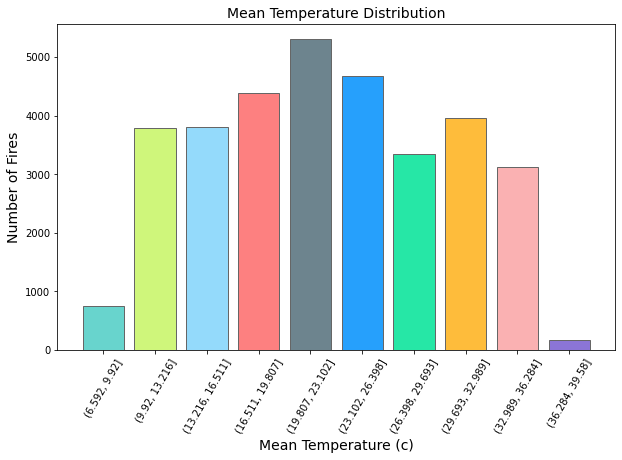

In [26]:
df8=df[['TMEAN_c']].copy()
df8['bins']=pd.cut(x=df8['TMEAN_c'], bins=10)
df_gb_bin8=df8.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(10,6))
im=ax.bar(df_gb_bin8['bins'].astype(str), df_gb_bin8['TMEAN_c'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Mean Temperature (c)", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Mean Temperature Distribution",size=14)
plt.xticks(rotation=60)
plt.show()

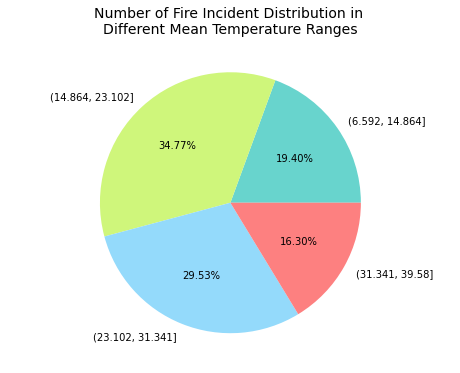

In [27]:
df8=df[['TMEAN_c']].copy()
df8['bins']=pd.cut(x=df8['TMEAN_c'], bins=4)
df_gb_bin8=df8.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin8['TMEAN_c'], labels = df_gb_bin8['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("Number of Fire Incident Distribution in \nDifferent Mean Temperature Ranges",size=14)
plt.show()

### Dew point Temperature vs Fire

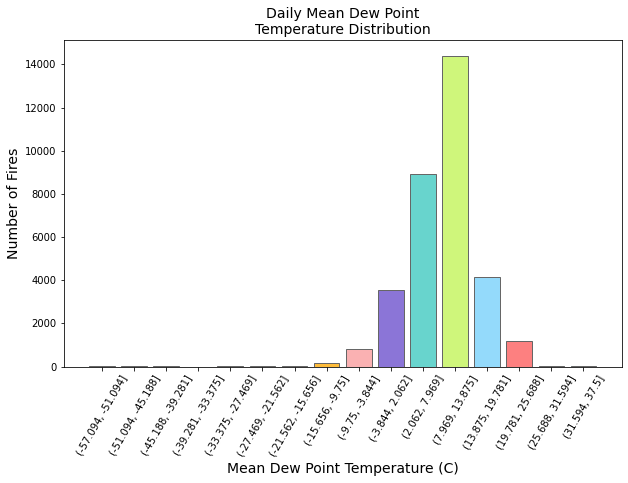

In [28]:
df9=df[['Station_TDMEAN_c']].copy()
df9['bins']=pd.cut(x=df9['Station_TDMEAN_c'], bins=16)
df_gb_bin9=df9.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(10,6))
im=ax.bar(df_gb_bin9['bins'].astype(str), df_gb_bin9['Station_TDMEAN_c'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Mean Dew Point Temperature (C)", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Daily Mean Dew Point\nTemperature Distribution",size=14)
plt.xticks(rotation=60)
plt.show()

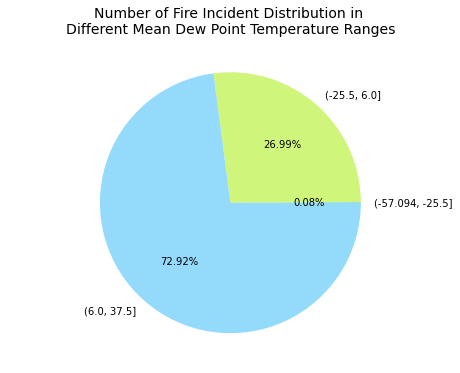

In [29]:
df9=df[['Station_TDMEAN_c']].copy()
df9['bins']=pd.cut(x=df9['Station_TDMEAN_c'], bins=3)
df_gb_bin9=df9.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin9['Station_TDMEAN_c'], labels = df_gb_bin9['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("Number of Fire Incident Distribution in \nDifferent Mean Dew Point Temperature Ranges",size=14)
plt.show()

### VPD 9AM

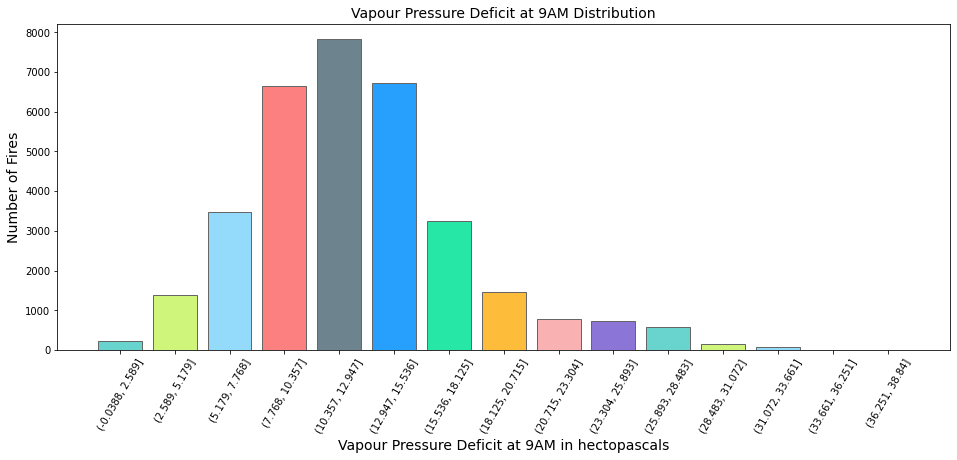

In [30]:
df10=df[['VPD9AM_hpa']].copy()
df10['bins']=pd.cut(x=df10['VPD9AM_hpa'], bins=15)
df_gb_bin10=df10.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(16,6))
im=ax.bar(df_gb_bin10['bins'].astype(str), df_gb_bin10['VPD9AM_hpa'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Vapour Pressure Deficit at 9AM in hectopascals", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Vapour Pressure Deficit at 9AM Distribution",size=14)
plt.xticks(rotation = 60) 
plt.show()

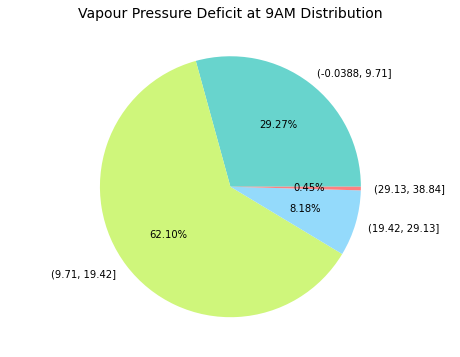

In [31]:
df10=df[['VPD9AM_hpa']].copy()
df10['bins']=pd.cut(x=df10['VPD9AM_hpa'], bins=4)
df_gb_bin10=df10.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin10['VPD9AM_hpa'], labels = df_gb_bin10['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("Vapour Pressure Deficit at 9AM Distribution",size=14)
plt.show()

###VPD 3PM

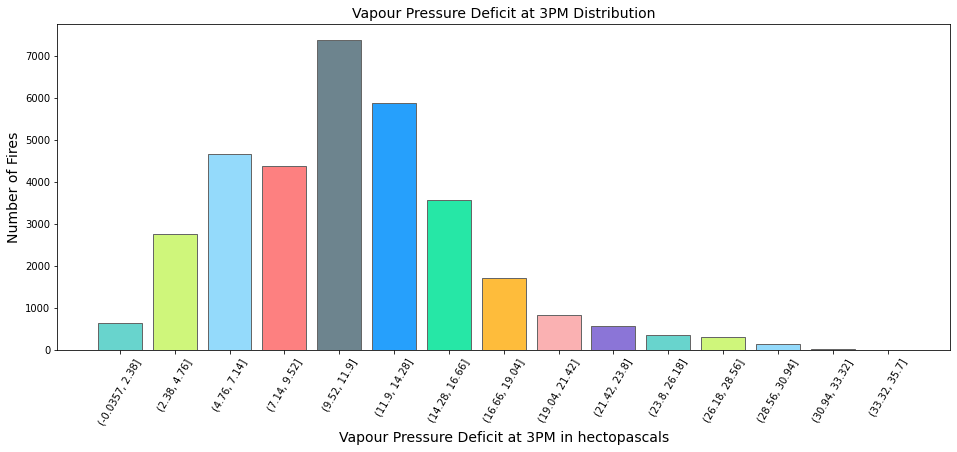

In [32]:
df11=df[['VPD3PM_hpa']].copy()
df11['bins']=pd.cut(x=df11['VPD3PM_hpa'], bins=15)
df_gb_bin11=df11.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(16,6))
im=ax.bar(df_gb_bin11['bins'].astype(str), df_gb_bin11['VPD3PM_hpa'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Vapour Pressure Deficit at 3PM in hectopascals", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Vapour Pressure Deficit at 3PM Distribution",size=14)
plt.xticks(rotation = 60) 
plt.show()

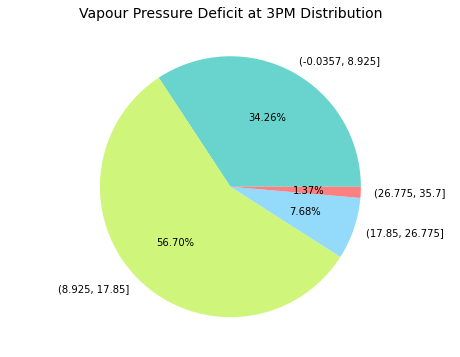

In [33]:
df11=df[['VPD3PM_hpa']].copy()
df11['bins']=pd.cut(x=df11['VPD3PM_hpa'], bins=4)
df_gb_bin11=df11.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin11['VPD3PM_hpa'], labels = df_gb_bin11['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("Vapour Pressure Deficit at 3PM Distribution",size=14)
plt.show()

### LFMC Mean

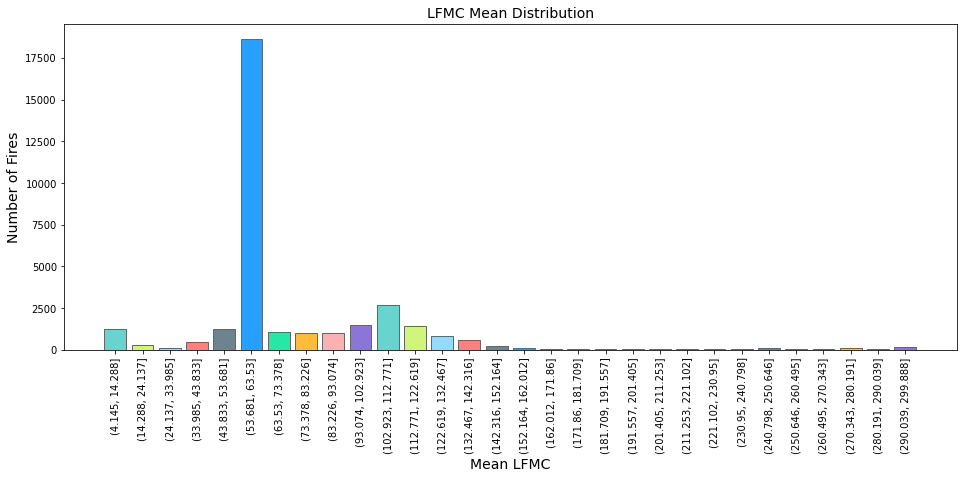

In [34]:
df12=df[['lfmc_mean']].copy()
df12['bins']=pd.cut(x=df12['lfmc_mean'], bins=30)
df_gb_bin12=df12.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(16,6))
im=ax.bar(df_gb_bin12['bins'].astype(str), df_gb_bin12['lfmc_mean'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Mean LFMC", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("LFMC Mean Distribution",size=14)
plt.xticks(rotation = 90) 
plt.show()

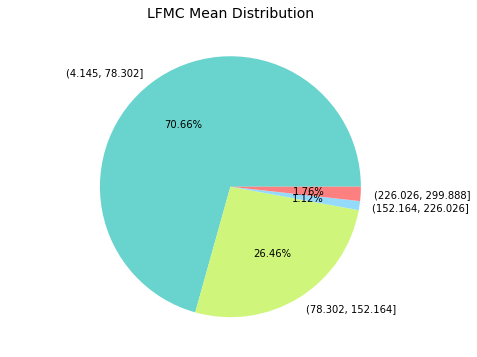

In [35]:
df12=df[['lfmc_mean']].copy()
df12['bins']=pd.cut(x=df12['lfmc_mean'], bins=4)
df_gb_bin12=df12.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin12['lfmc_mean'], labels = df_gb_bin12['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("LFMC Mean Distribution",size=14)
plt.show()

### LFMC stdv

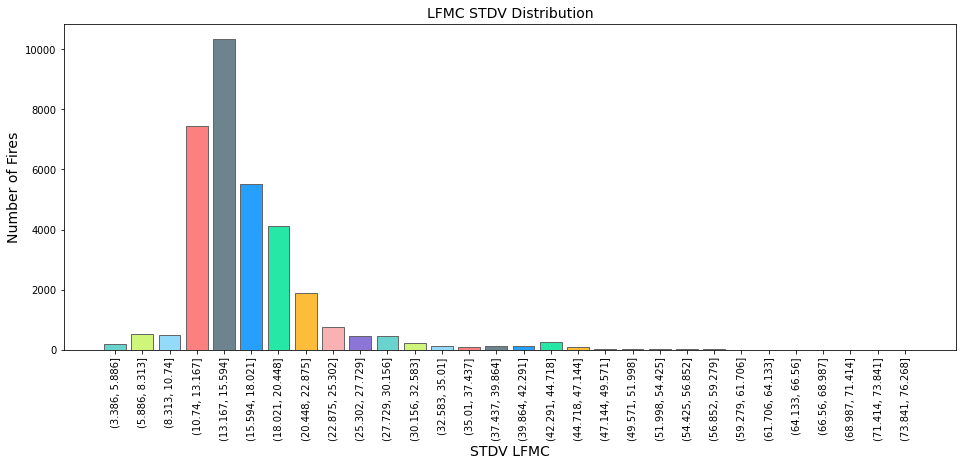

In [36]:
df13=df[['lfmc_stdv']].copy()
df13['bins']=pd.cut(x=df13['lfmc_stdv'], bins=30)
df_gb_bin13=df13.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(16,6))
im=ax.bar(df_gb_bin13['bins'].astype(str), df_gb_bin13['lfmc_stdv'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("STDV LFMC", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("LFMC STDV Distribution",size=14)
plt.xticks(rotation = 90) 
plt.show()

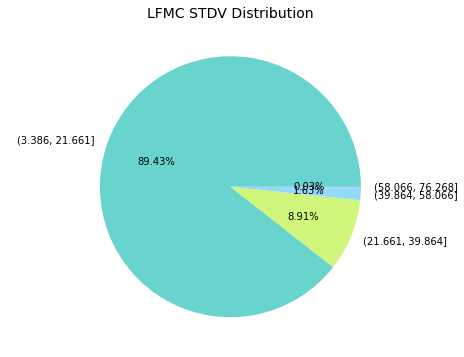

In [37]:
df13=df[['lfmc_stdv']].copy()
df13['bins']=pd.cut(x=df13['lfmc_stdv'], bins=4)
df_gb_bin13=df13.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin13['lfmc_stdv'], labels = df_gb_bin13['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("LFMC STDV Distribution",size=14)
plt.show()

### Mean Sea Level Pressure

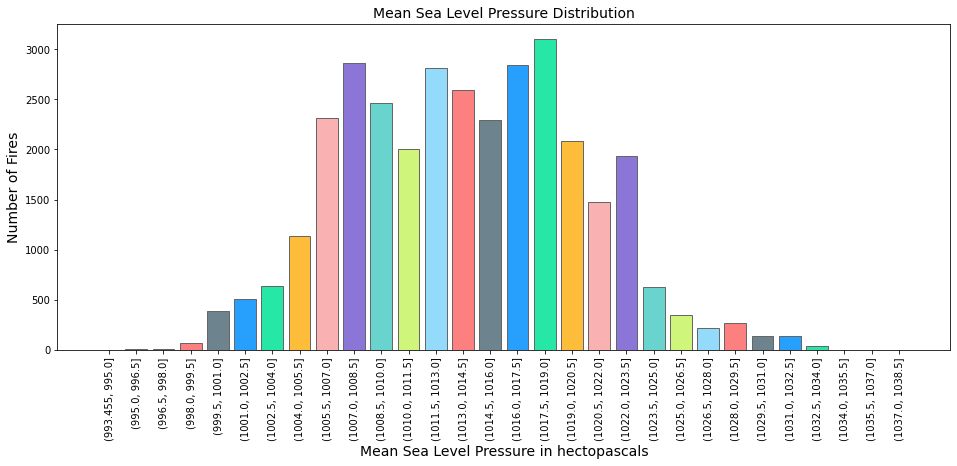

In [38]:
df14=df[['Mean_Sea_Level_Pressure']].copy()
df14['bins']=pd.cut(x=df14['Mean_Sea_Level_Pressure'], bins=30)
#df9['bins']=pd.qcut(df9['TDMEAN_c'],10)
df_gb_bin14=df14.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(16,6))
im=ax.bar(df_gb_bin14['bins'].astype(str), df_gb_bin14['Mean_Sea_Level_Pressure'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Mean Sea Level Pressure in hectopascals", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Mean Sea Level Pressure Distribution",size=14)
plt.xticks(rotation = 90) 
plt.show()

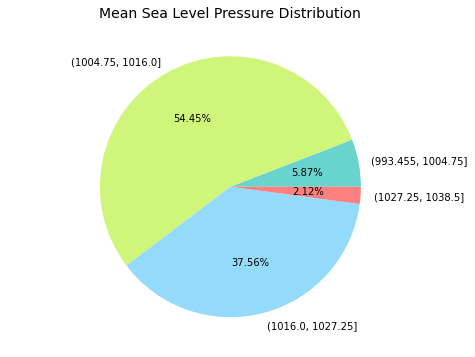

In [39]:
df14=df[['Mean_Sea_Level_Pressure']].copy()
df14['bins']=pd.cut(x=df14['Mean_Sea_Level_Pressure'], bins=4)
df_gb_bin14=df14.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin14['Mean_Sea_Level_Pressure'], labels = df_gb_bin14['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("Mean Sea Level Pressure Distribution",size=14)
plt.show()

### Mean Station Pressure

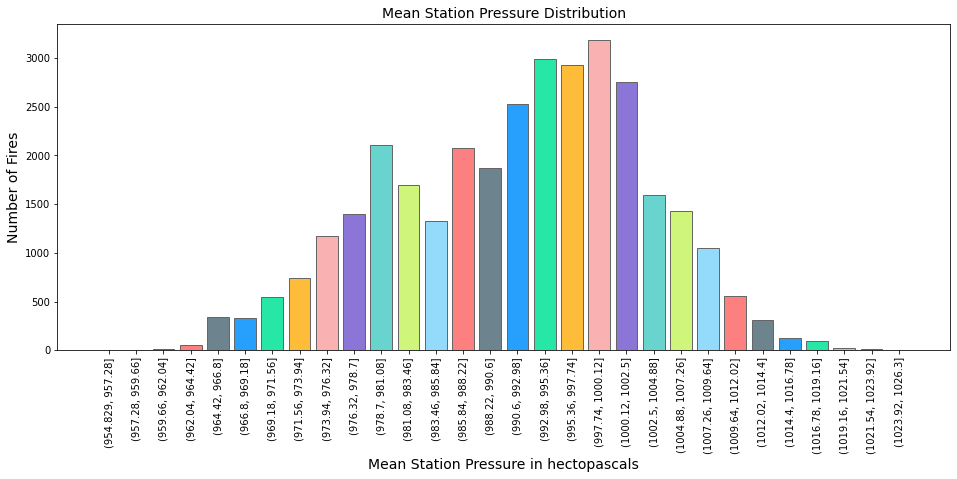

In [40]:
df15=df[['Mean_Station_Pressure']].copy()
df15['bins']=pd.cut(x=df15['Mean_Station_Pressure'], bins=30)
#df9['bins']=pd.qcut(df9['TDMEAN_c'],10)
df_gb_bin15=df15.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(16,6))
im=ax.bar(df_gb_bin15['bins'].astype(str), df_gb_bin15['Mean_Station_Pressure'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Mean Station Pressure in hectopascals", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Mean Station Pressure Distribution",size=14)
plt.xticks(rotation = 90) 
plt.show()

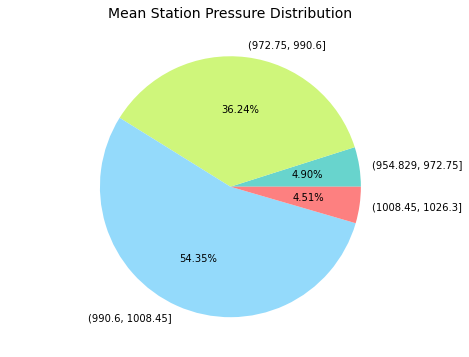

In [41]:
df15=df[['Mean_Station_Pressure']].copy()
df15['bins']=pd.cut(x=df15['Mean_Station_Pressure'], bins=4)
df_gb_bin15=df15.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin15['Mean_Station_Pressure'], labels = df_gb_bin15['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("Mean Station Pressure Distribution",size=14)
plt.show()

### Mean wind speed

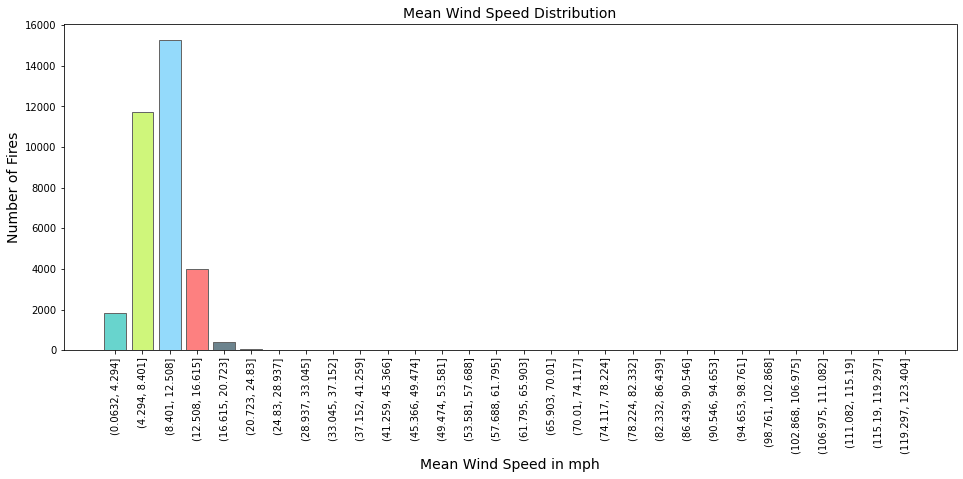

In [42]:
df16=df[['Mean_Wind_Speed']].copy()
df16['bins']=pd.cut(x=df16['Mean_Wind_Speed']*0.621371, bins=30)
#df9['bins']=pd.qcut(df9['TDMEAN_c'],10)
df_gb_bin16=df16.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(16,6))
im=ax.bar(df_gb_bin16['bins'].astype(str), df_gb_bin16['Mean_Wind_Speed'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Mean Wind Speed in mph", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Mean Wind Speed Distribution",size=14)
plt.xticks(rotation = 90) 
plt.show()

In [43]:
df_gb_bin16

,bins,Mean_Wind_Speed
0,"(0.0632, 4.294]",1837
1,"(4.294, 8.401]",11739
2,"(8.401, 12.508]",15290
3,"(12.508, 16.615]",3975
4,"(16.615, 20.723]",395
5,"(20.723, 24.83]",42
6,"(24.83, 28.937]",2
7,"(28.937, 33.045]",2
8,"(33.045, 37.152]",3
9,"(37.152, 41.259]",1


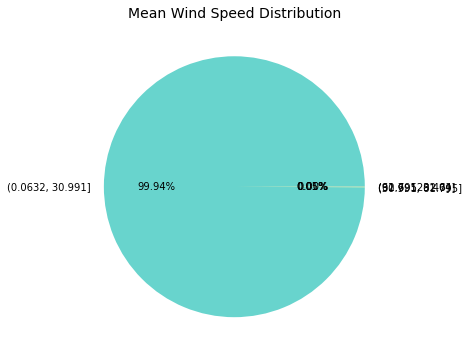

In [44]:
df16=df[['Mean_Wind_Speed']].copy()
df16['bins']=pd.cut(x=df16['Mean_Wind_Speed']*0.621371, bins=4)
df_gb_bin16=df16.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin16['Mean_Wind_Speed'], labels = df_gb_bin16['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("Mean Wind Speed Distribution",size=14)
plt.show()

### Maximum Sustained Wind Speed

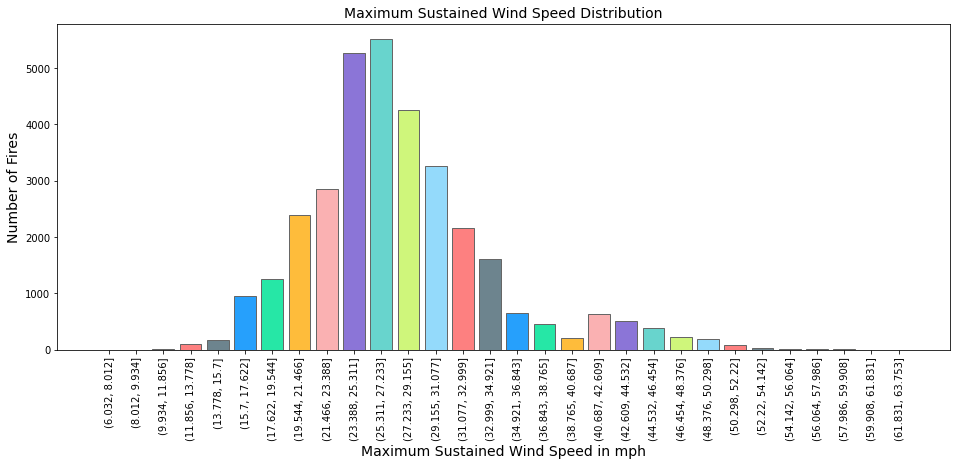

In [45]:
df17=df[['Maximum_Sustained_Wind_Speed']].copy()
df17['bins']=pd.cut(x=df17['Maximum_Sustained_Wind_Speed']*0.621371, bins=30)
df_gb_bin17=df17.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(16,6))
im=ax.bar(df_gb_bin17['bins'].astype(str), df_gb_bin17['Maximum_Sustained_Wind_Speed'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("Maximum Sustained Wind Speed in mph", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("Maximum Sustained Wind Speed Distribution",size=14)
plt.xticks(rotation = 90) 
plt.show()

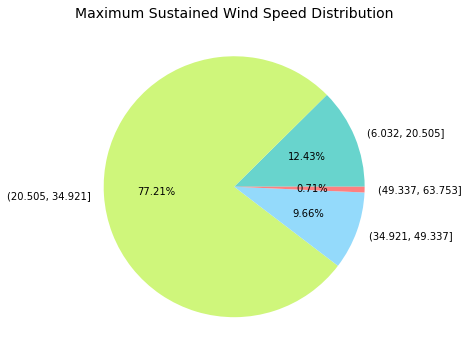

In [46]:
df17=df[['Maximum_Sustained_Wind_Speed']].copy()
df17['bins']=pd.cut(x=df17['Maximum_Sustained_Wind_Speed']*0.621371, bins=4)
df_gb_bin17=df17.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin17['Maximum_Sustained_Wind_Speed'], labels = df_gb_bin17['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("Maximum Sustained Wind Speed Distribution",size=14)
plt.show()

### Population

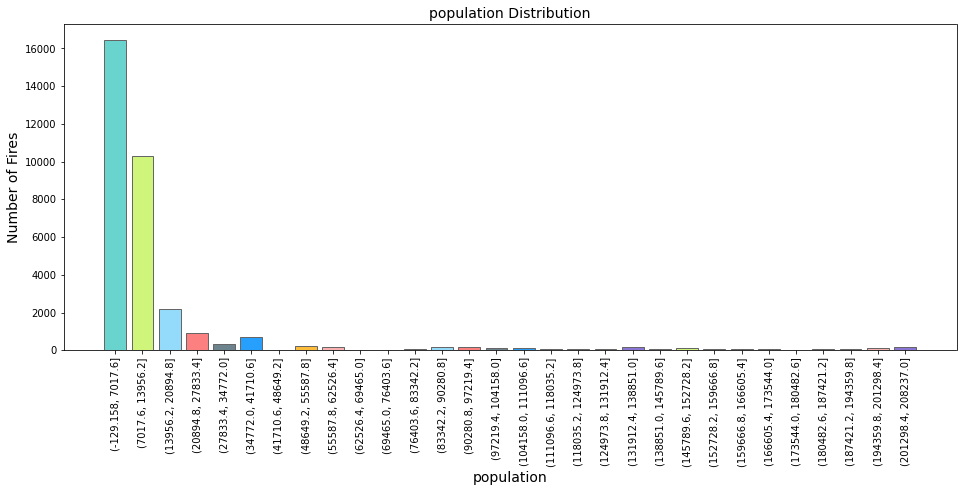

In [47]:
df18=df[['population']].copy()
df18['bins']=pd.cut(x=df18['population'], bins=30)
df_gb_bin18=df18.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(16,6))
im=ax.bar(df_gb_bin18['bins'].astype(str), df_gb_bin18['population'], color=barcolor, edgecolor=edgecolor)
ax.set_xlabel("population", size=14)
ax.set_ylabel("Number of Fires", size=14)
ax.set_title("population Distribution",size=14)
plt.xticks(rotation = 90) 
plt.show()

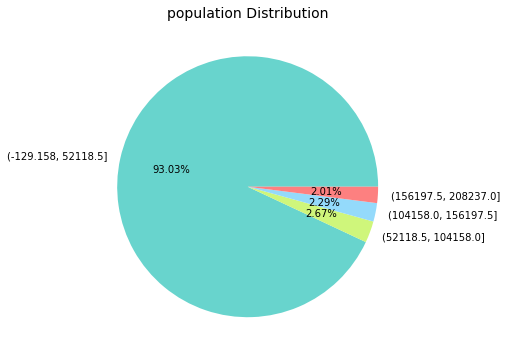

In [48]:
df18=df[['population']].copy()
df18['bins']=pd.cut(x=df18['population'], bins=4)
df_gb_bin18=df18.groupby(['bins'], as_index=False).count()
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('equal')
ax.pie(df_gb_bin18['population'], labels = df_gb_bin18['bins'].astype(str),autopct='%1.2f%%', colors=barcolor)
ax.set_title("population Distribution",size=14)
plt.show()

### County

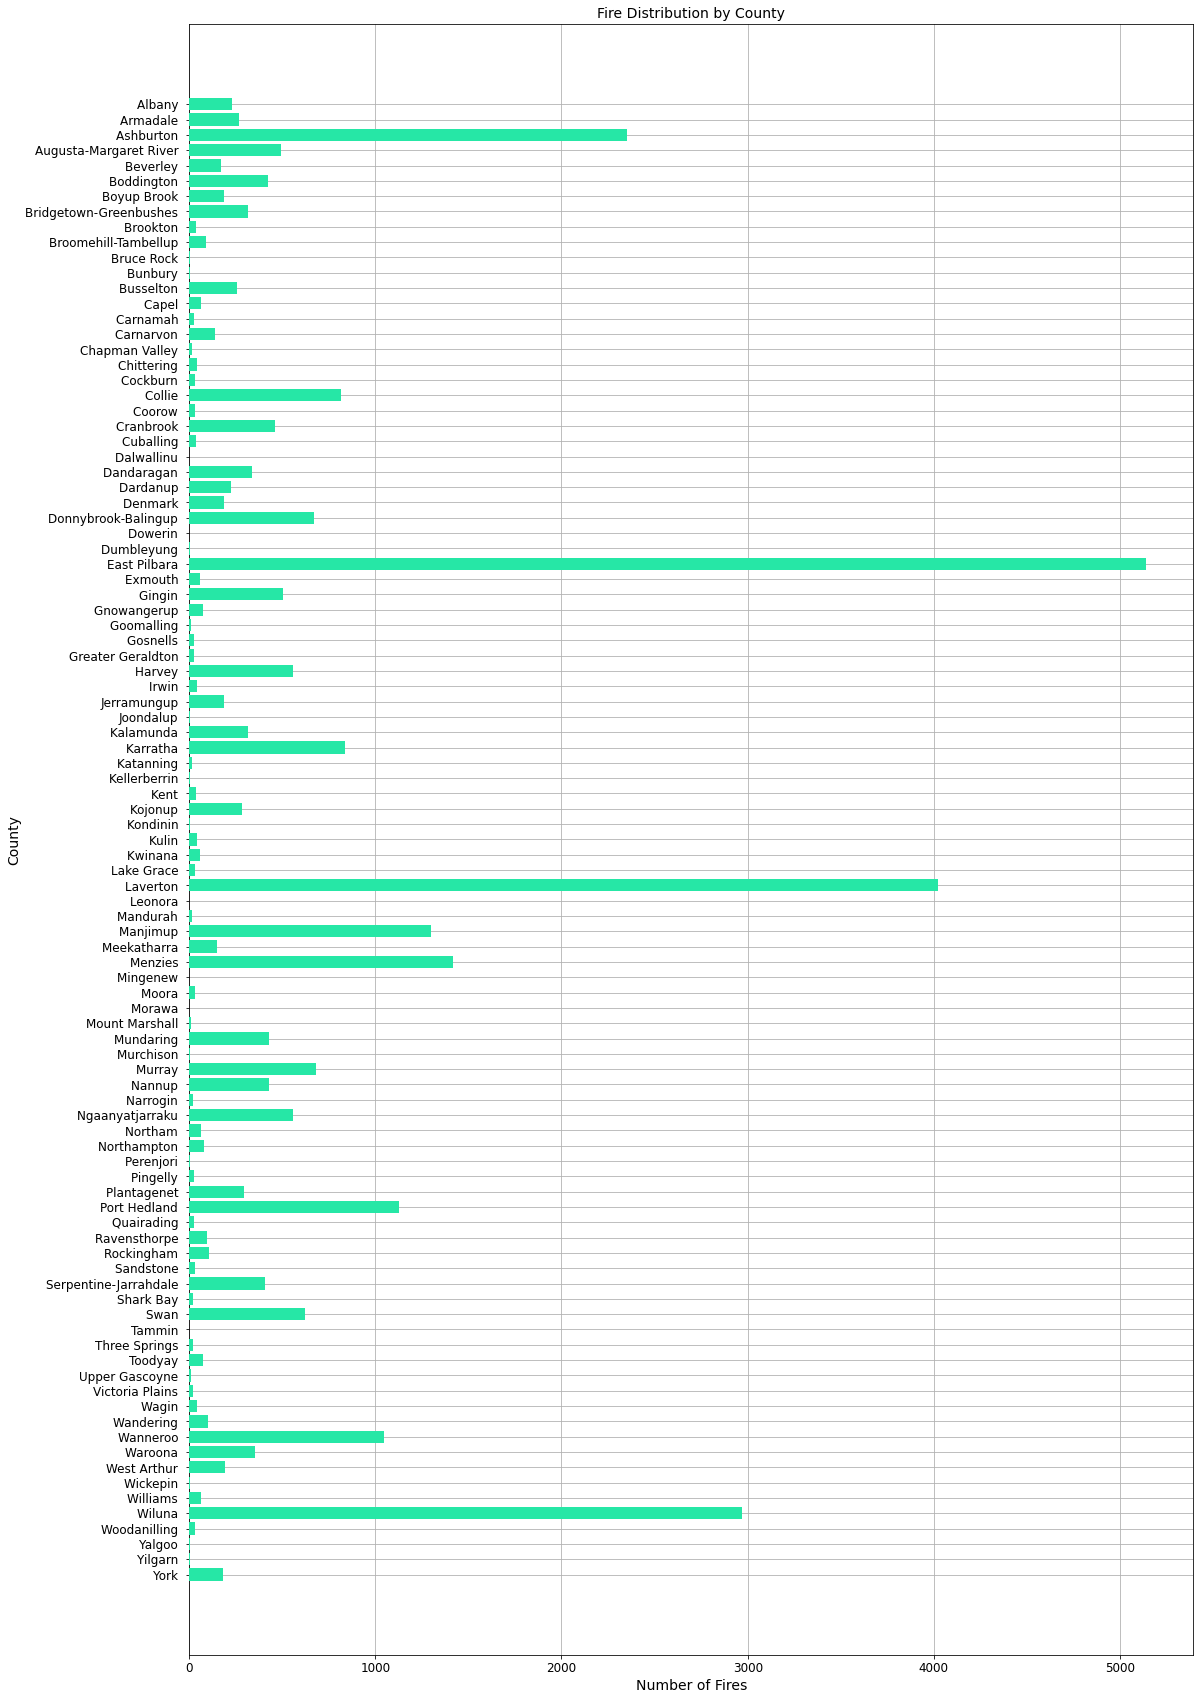

In [49]:
df_gb19 = df[['NAMELSAD','ACRES']].groupby(['NAMELSAD'], as_index=False).count().rename(columns={"ACRES": "COUNT"})
fig, ax = plt.subplots(figsize=(18,30))
im=ax.barh(df_gb19['NAMELSAD'].replace('\([SCT]\)','', regex=True), df_gb19['COUNT'], color='#26E7A6', zorder=6)
ax.grid(True, zorder=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel("County", size=14)
ax.set_xlabel("Number of Fires", size=14)
ax.set_title("Fire Distribution by County",size=14)
ax.invert_yaxis()
plt.show()

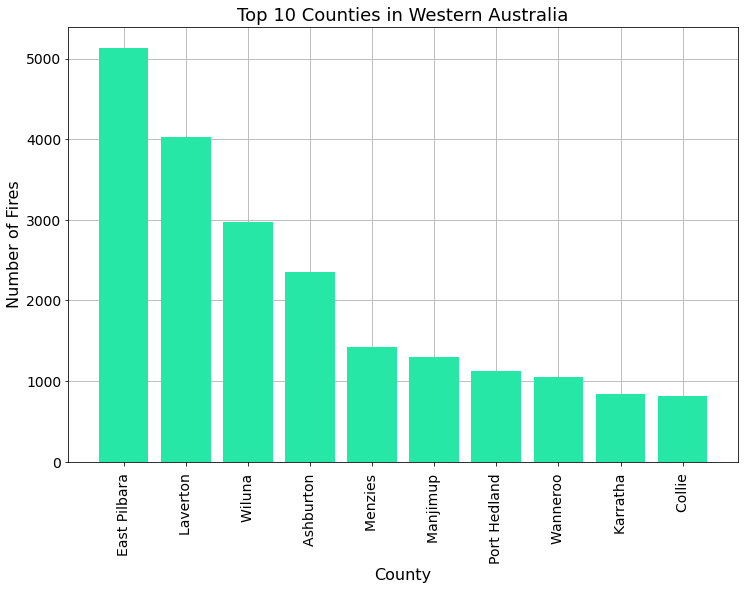

In [50]:
df_gb19 = df[['NAMELSAD','ACRES']].groupby(['NAMELSAD'], as_index=False).count().rename(columns={"ACRES": "COUNT"})
df_gb19_t10=df_gb19.sort_values('COUNT',ascending = False).head(10)
fig, ax = plt.subplots(figsize=(12,8))
im=ax.bar(df_gb19_t10['NAMELSAD'].replace('\([SCT]\)','', regex=True), df_gb19_t10['COUNT'], color='#26E7A6', zorder=7)
ax.grid(True, zorder=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel("County", size=16)
ax.set_ylabel("Number of Fires", size=16)
ax.set_title("Top 10 Counties in Western Australia",size=18)
plt.xticks(rotation = 90) 
plt.show()

In [51]:
df_gb19_t10

,NAMELSAD,COUNT
30,East Pilbara (S),5137
51,Laverton (S),4021
92,Wiluna (S),2969
2,Ashburton (S),2350
56,Menzies (S),1417
54,Manjimup (S),1300
72,Port Hedland (T),1128
87,Wanneroo (C),1047
42,Karratha (C),836
19,Collie (S),817


### Correllation plots

In [52]:
df20=df.copy()

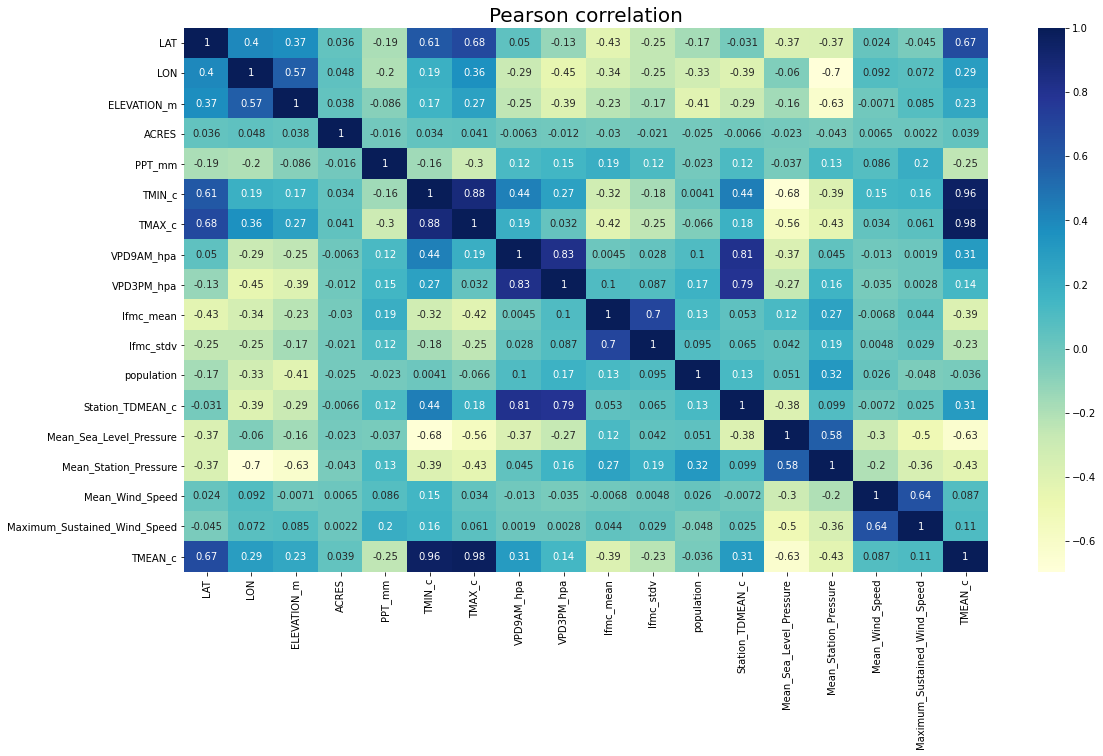

In [53]:
fig=plt.figure(figsize=(18,10))
sn.heatmap(df20.corr(method='pearson'), annot=True, cmap="YlGnBu")
plt.title('Pearson correlation', fontdict=dict(size=20))
plt.show()

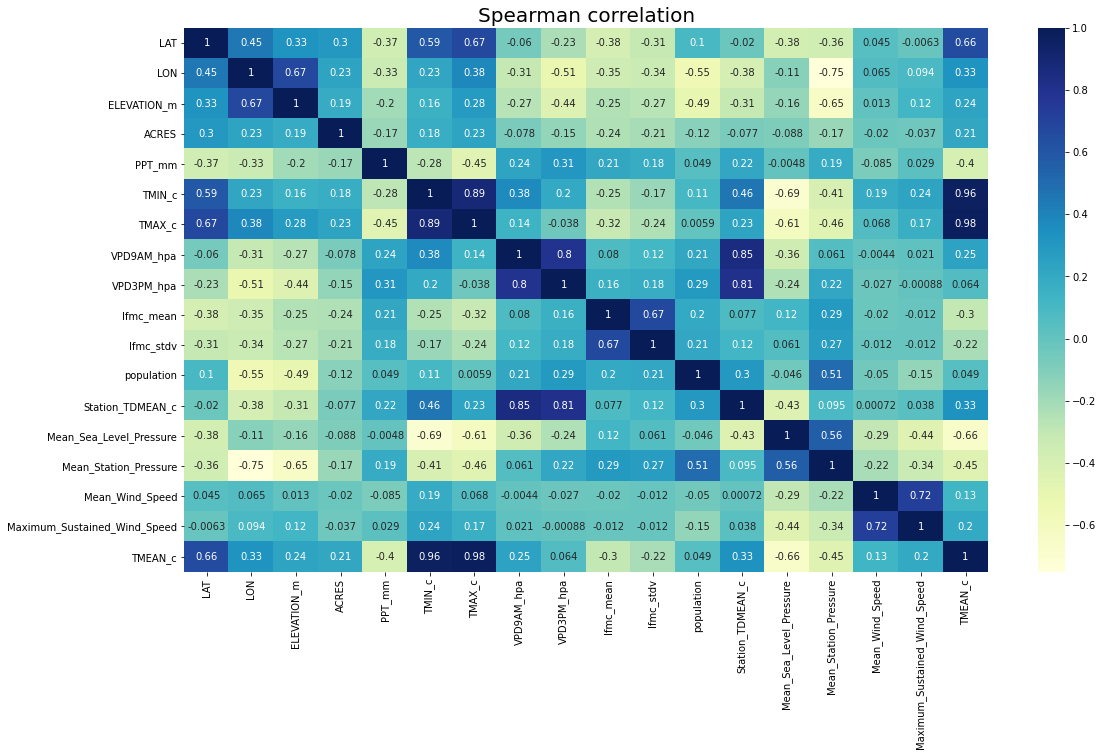

In [54]:
fig=plt.figure(figsize=(18,10))
sn.heatmap(df20.corr(method='spearman'), annot=True, cmap="YlGnBu")
plt.title('Spearman correlation', fontdict=dict(size=20))
plt.show()